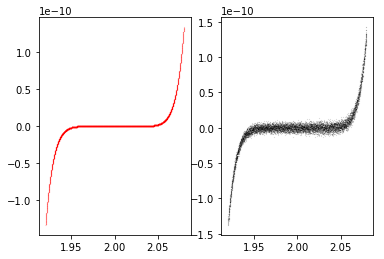

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def p1(x):
    return (x-2)**9

def p2(x):
    c = [1, -18, 144, -672, 2016, -4032, 5376,
         -4608, 2304, -512]
    p = c[0]
    for i in range(1, len(c)):
        p = x*p + c[i]
        
    return p

x = np.linspace(1.92, 2.08, num=8000, endpoint=True)
y1 = p1(x)
y2 = p2(x)
fig = plt.figure()
a1 = fig.add_subplot(1, 2, 1)
a2 = fig.add_subplot(1, 2, 2)
a1.plot(x, y1, 'r.', markersize=0.1)
a2.plot(x, y2, 'k.', markersize=0.1)
plt.show()

In [14]:
def bisect(p, xl, xh, tol=1e-8):
    """find a root of p(x)=0 in [xl, xh].
        assuming p(xl)*p(xh) < 0
        stop is zero found to within \pm tol
    """
    pl = p(xl)
    ph = p(xh)
    while (xh - xl) > 2*tol:
        xm = (xl + xh)/2
        pm = p(xm)
        if pm*pl < 0:
            xh = xm
            ph = pm
        elif pm*ph < 0:
            xl = xm
            pl = pm
        else:
            xl = xm
            xh = xm
    r = (xl+xh)/2
    return r
x1 = bisect(p1, 1.89, 2.15)
x2 = bisect(p2, 1.89, 2.15)
print('x1=', x1)
print('x2=', x2)

x1= 1.9999999934434889
x2= 2.028171235918999


In [15]:
int('1'*8, 2)

255

In [16]:
2**(-24)

5.960464477539063e-08

In [17]:
2**(-126)

1.1754943508222875e-38

In [1]:
from sympy import * # 导入 sympy 中的所有功能
init_printing(use_latex=True) 
from IPython.display import display # 显示公式

In [2]:
eps = Symbol('epsilon')
expand((1+eps)**10)

In [3]:
series(1/(1 - 10*eps))

In [5]:
expand((1-eps)**10)

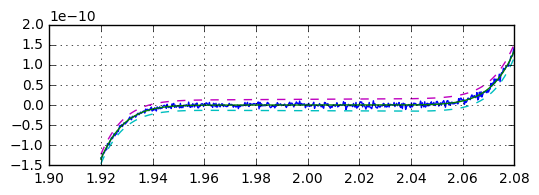

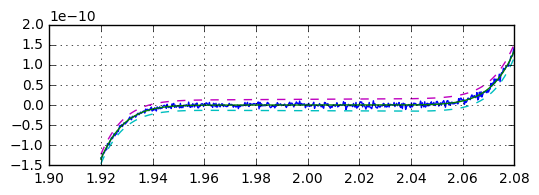

In [2]:
from matplotlib import pyplot as plt
import numpy as np


c = [-512, 2304, -4608, 5376, -4032, 2016, -672, 144, -18, 1]
eps = 0.3 * 1e-17


def error_p(var_x, eps):
    p, bp = [c[-1], abs(c[-1])]
    for i in range(len(c) - 2, -1, -1):
        p = p * var_x + c[i]
        bp = abs(x) * bp + abs(c[i])
    return p, 2 * (len(c) - 1) * eps * bp


fig = plt.figure()
x = np.linspace(1.92, 2.08, 500)
y, by = error_p(var_x=x, eps=eps)

ax1 = fig.add_subplot(211)
ax1.plot(x, y)
ax1.plot(x, (x - 2) ** 9)
ax1.plot(x, (x - 2) ** 9 + abs(by), 'm--')
ax1.plot(x, (x - 2) ** 9 - abs(by), 'c--')
ax1.grid(True)
plt.show()

In [8]:
from matplotlib import pyplot as plt
import numpy as np


c = [-512, 2304, -4608, 5376, -4032, 2016, -672, 144, -18, 1]
eps = 0.3 * 1e-17


def error_true(var_x, eps):
    abs_ans = np.sum(np.abs(c * var_x ** np.linspace(0, len(c) - 1, len(c))))
    ans = np.abs(np.sum(c * var_x ** np.linspace(0, len(c) - 1, len(c))))
    return 2 * (len(c) - 1) * eps * abs_ans / ans


x = np.linspace(-2, 6, 100)
y, by = error_p(var_x=x, eps=eps)
ax2 = fig.add_subplot(212)

ax2.scatter(x, -np.log10(abs(by / (x - 2) ** 9)), s=1, c='c')
ax2.plot(x, -np.log10(abs(by / y)))
ax2.grid(True)
ax2.set_ylim(0, 18)

plt.show()